In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# MNIST dataset loaded for training and testing
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

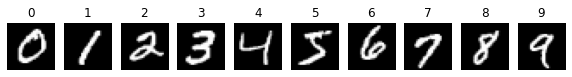

In [44]:
# Show one image for each of the digits 0 to 9
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 100))

for i in range(10):

    idx = y_train == i # show 0 to 9
    axes[i].imshow(x_train[idx][0], cmap="gray") #show image
    axes[i].set_title(str(i)) # set title
    axes[i].axis("off") # hide axes

In [45]:
# Normalize the input data
x_train = x_train.astype("float32") / 255.0 # train data converted between 0 to 1 for faster training
x_test = x_test.astype("float32") / 255.0 # tested data converted between 0 to 1 for faster training

In [46]:
# Convert the labels to one-hot encoding.One-hot encoding is a process of converting categorical data into a binary vector where only one element is set to 1, and all other elements are set to 0.
y_train = keras.utils.to_categorical(y_train, 10) # here 10 is number of class
y_test = keras.utils.to_categorical(y_test, 10)

In [47]:
# Define the model architecture
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)), # both width,height is 28
    layers.Dense(128, activation="relu"), # use 128 neuron and Rectified Linear Unit (ReLU) activation function
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [48]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # here categorical_crossentropy used for multi-class classification problems


In [49]:
# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2) # here 20% of the training data will be split into a validation set, and the remaining 80% will be used for training

Epoch 1/50
375/375 [==============================] - 4s 7ms/step - loss: 0.3867 - accuracy: 0.8847 - val_loss: 0.1613 - val_accuracy: 0.9519
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1466 - accuracy: 0.9558 - val_loss: 0.1139 - val_accuracy: 0.9664
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1012 - accuracy: 0.9697 - val_loss: 0.1036 - val_accuracy: 0.9683
Epoch 4/50
375/375 [==============================] - 3s 9ms/step - loss: 0.0785 - accuracy: 0.9762 - val_loss: 0.0937 - val_accuracy: 0.9714
Epoch 5/50
375/375 [==============================] - 2s 7ms/step - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.0973 - val_accuracy: 0.9710
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.0896 - val_accuracy: 0.9737
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 0.0401 - accuracy: 0.9881 - val_loss: 0.0945 - val_accuracy: 0.9748
Epoch 

In [50]:
# Evaluate the model based on the test data

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1356 - accuracy: 0.9788
Test accuracy: 0.9787999987602234


In [51]:
# Dictionary created to map the digit labels (0 to 9) to their corresponding images

digit_to_img = {i: x_test[np.where(y_test[:, i] == 1)[0][0]].reshape(28, 28) for i in range(10)}

Take a input from a digit (0-9) : 2


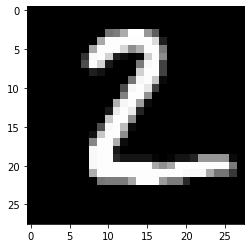

Take a input from a digit (0-9) : 3


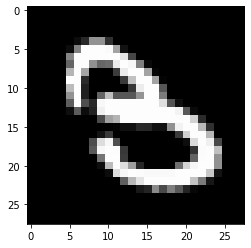

Take a input from a digit (0-9) : -999


In [52]:
# Infinite loop for taking input one more times.

while True:

    input_data = input('Take a input from a digit (0-9) : ')
    
    # Break the loop if input is -1
    if input_data == '-999':

        break
        
    # Show the image for a given input digit
    if input_data.isdigit() and int(input_data) in digit_to_img:

        plt.imshow(digit_to_img[int(input_data)], cmap='gray')

        plt.show()
        
    # Show all of digit images in a grid section
    elif input_data == 'all':

        fig, axs = plt.subplots(2, 5, figsize=(12, 6))

        axs = axs.flatten()

        for i in range(10):

            axs[i].imshow(digit_to_img[i], cmap='gray')
            axs[i].set_title(str(i))
            axs[i].axis('off')

        plt.show()
        
    # Notify user to take valid input
    else:
        print('Invalid Input ! For valid, Given a digit between (0-9) or "plot".')